In [358]:
import pandas as pd
import seaborn as sns
from pandas_datareader import data as web
from datetime import datetime
from matplotlib import pyplot as plt

In [309]:
data_path = 'compras.csv'
datetime.now().strftime('%Y-%m-%d %H:%M:%S')

'2020-07-31 12:06:21'

In [385]:
class Stockz: 
    
    def read_csv(self, data_path):
        
        print(f'Lendo o arquivo {data_path}')
        self.comp = pd.read_csv(data_path)

        for col in ['DATA', 'TIPO', 'ATIVO', 'QTD']:
            assert col in self.comp.columns , print(f'dataset nao possui a coluna {col}')
            
        return self.comp
    
    
    
    def make_pivot_wallet(self, data_path):
        
        self.comp =  self.read_csv(data_path)
        
        comp = self.comp

        comp['DATA'] = pd.to_datetime(comp['DATA'])
        comp.loc[comp.TIPO == 'VENDA', 'QTD'] *= -1

        comp = comp.pivot('DATA', 'ATIVO', "QTD")\
                    .cumsum()\
                    .ffill()\
                    .resample('D')\
                    .ffill()\
                    .fillna(0)

        comp = comp[comp.index < datetime.now().strftime('%Y-%m-%d %H:%M:%S')]

        return comp.astype(int)
    


In [387]:
Stockz().make_pivot_wallet('compras.csv')

Lendo o arquivo compras.csv


ATIVO,ABEV3,ALZR11,AZUL4,BIDI4,CIEL3,HGLG11,ITSA4,KNRI11,LLIS3,VVAR3
DATA,,,,,,,,,,
2019-01-02,0,0,0,10,0,0,0,0,0,0
2019-01-03,0,0,0,10,0,0,0,0,0,0
2019-01-04,0,0,0,10,0,0,0,0,0,0
2019-01-05,0,0,0,10,0,0,0,0,0,0
2019-01-06,0,0,0,10,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2020-07-27,10,10,10,0,10,65,0,40,10,10
2020-07-28,10,10,10,0,10,65,0,40,10,10
2020-07-29,10,10,10,0,10,65,0,40,10,10


In [ ]:
x    10  nan
x+20 nan 10
x+30 10  10

x    10   0
x+1  10  10
....

x+20 10  10
x+30 20  20

In [379]:
def make_pivot_wallet(data_path):
    
    comp = pd.read_csv('compras.csv')

    for col in ['DATA', 'TIPO','ATIVO',  'QTD']:
        assert col in comp.columns , print(f'dataset nao possui a coluna {col}')
        
    comp['DATA'] = pd.to_datetime(comp['DATA'])
    comp.loc[comp.TIPO == 'VENDA', 'QTD'] *= -1
    
    comp = comp.pivot('DATA', 'ATIVO', "QTD")\
                .cumsum()\
                .ffill()\
                .resample('D')\
                .ffill()\
                .fillna(0)

    comp = comp[comp.index < datetime.now().strftime('%Y-%m-%d %H:%M:%S')]

    return comp.astype(int)

wallet = make_pivot_wallet(data_path)

wallet.tail()

ATIVO,ABEV3,ALZR11,AZUL4,BIDI4,CIEL3,HGLG11,ITSA4,KNRI11,LLIS3,VVAR3
DATA,,,,,,,,,,
2020-07-27,10,10,10,0,10,65,0,40,10,10
2020-07-28,10,10,10,0,10,65,0,40,10,10
2020-07-29,10,10,10,0,10,65,0,40,10,10
2020-07-30,10,10,10,0,10,65,0,40,10,10
2020-07-31,10,10,10,0,10,65,0,40,10,10


In [343]:
def get_historical_prices(wallet):
    prices = pd.DataFrame(index = wallet.index)
    for i in wallet.columns:
        prices[i] = web.DataReader(str(i)+'.SA', 
                                   data_source='yahoo', 
                                   start=wallet.index.min().strftime('%Y-%m-%d')
                                  )['Close']
    return prices

prices = get_historical_prices(wallet)

prices.tail()

,ABEV3,ALZR11,AZUL4,BIDI4,CIEL3,HGLG11,ITSA4,KNRI11,LLIS3,VVAR3
DATA,,,,,,,,,,
2020-07-27,15.28,121.690002,20.709999,18.950001,5.24,174.940002,11.02,157.149994,5.62,18.910000
2020-07-28,15.09,121.970001,21.520000,19.100000,5.12,176.880005,10.88,157.000000,5.51,20.410000
2020-07-29,15.15,120.750000,20.959999,20.219999,4.94,179.000000,11.13,157.000000,5.47,20.120001
2020-07-30,14.55,119.790001,21.020000,20.299999,4.84,179.000000,10.91,157.500000,5.82,20.200001
2020-07-31,14.06,119.500000,20.540001,20.170000,5.06,180.679993,10.68,158.699997,5.72,20.270000


In [349]:
def make_wallet_weights(wallet, prices):
    df = prices*wallet
    df = df.dropna(how = 'all')
    df = df.div(df.sum(axis=1), axis=0)
    
    return df

weights = make_wallet_weights(wallet, prices)

weights.tail()

,ABEV3,ALZR11,AZUL4,BIDI4,CIEL3,HGLG11,ITSA4,KNRI11,LLIS3,VVAR3
DATA,,,,,,,,,,
2020-07-27,0.023455,0.112075,0.031789,0.0,0.008043,0.392053,0.016915,0.253283,0.017253,0.145132
2020-07-28,0.022796,0.110554,0.032510,0.0,0.007735,0.390123,0.016436,0.249034,0.016648,0.154164
2020-07-29,0.022873,0.109382,0.031644,0.0,0.007458,0.394559,0.016804,0.248883,0.016517,0.151881
2020-07-30,0.021961,0.108481,0.031726,0.0,0.007305,0.394446,0.016467,0.249604,0.017569,0.152442
2020-07-31,0.021135,0.107778,0.030875,0.0,0.007606,0.396527,0.016054,0.250482,0.017196,0.152347


In [353]:
def wallet_intraday_gains(prices):
    prices = prices.dropna()
    prices_shift = prices.shift(1).copy()
    prices = (prices - prices_shift)/prices_shift
    
    return prices

gains = wallet_intraday_gains(prices)

gains.tail()

,ABEV3,ALZR11,AZUL4,BIDI4,CIEL3,HGLG11,ITSA4,KNRI11,LLIS3,VVAR3
DATA,,,,,,,,,,
2020-07-27,0.023443,-0.002541,0.008276,0.028215,-0.005693,-0.010856,0.054546,-0.010951,0.003571,-0.032242
2020-07-28,-0.012435,0.002301,0.039112,0.007916,-0.022901,0.011090,-0.012704,-0.000954,-0.019573,0.079323
2020-07-29,0.003976,-0.010002,-0.026022,0.058639,-0.035156,0.011985,0.022978,0.000000,-0.007260,-0.014209
2020-07-30,-0.039604,-0.007950,0.002863,0.003956,-0.020243,0.000000,-0.019766,0.003185,0.063985,0.003976
2020-07-31,-0.033677,-0.002421,-0.022835,-0.006404,0.045455,0.009385,-0.021082,0.007619,-0.017182,0.003465


In [357]:
def make_wallet_gain(weights, gains):
    df = (weights * gains).sum(axis = 1)
    df += 1
    df = df.cumprod()
    
    return df

wallet_perc_gains = make_wallet_gain(weights, gains)
wallet_perc_gains.tail()

DATA
2020-07-27    1.481583
2020-07-28    1.506544
2020-07-29    1.507672
2020-07-30    1.508291
2020-07-31    1.514613
dtype: float64

In [350]:
weights.tail()

,ABEV3,ALZR11,AZUL4,BIDI4,CIEL3,HGLG11,ITSA4,KNRI11,LLIS3,VVAR3
DATA,,,,,,,,,,
2020-07-27,0.023455,0.112075,0.031789,0.0,0.008043,0.392053,0.016915,0.253283,0.017253,0.145132
2020-07-28,0.022796,0.110554,0.032510,0.0,0.007735,0.390123,0.016436,0.249034,0.016648,0.154164
2020-07-29,0.022873,0.109382,0.031644,0.0,0.007458,0.394559,0.016804,0.248883,0.016517,0.151881
2020-07-30,0.021961,0.108481,0.031726,0.0,0.007305,0.394446,0.016467,0.249604,0.017569,0.152442
2020-07-31,0.021135,0.107778,0.030875,0.0,0.007606,0.396527,0.016054,0.250482,0.017196,0.152347


In [356]:
def get_ibov(start_date):
    return web.DataReader('^BVSP', data_source='yahoo', start=start_date)['Close']


ibov = get_ibov('2019-01-02')

Date
2019-01-02     91012.00000
2019-01-03     91564.00000
2019-01-04     91841.00000
2019-01-07     91699.00000
2019-01-08     92032.00000
                  ...     
2020-07-27    104477.00000
2020-07-28    104109.00000
2020-07-29    105605.00000
2020-07-30    105009.00000
2020-07-31    103780.65625
Name: Close, Length: 392, dtype: float64

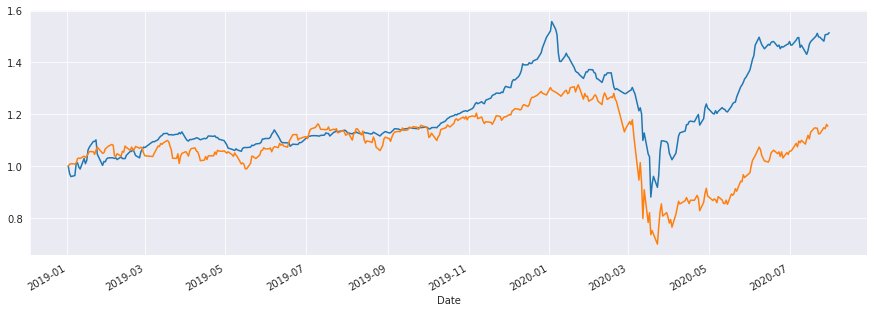

In [362]:
def plot_gains(wallet_perc_gains, ibov):
    sns.set_style("darkgrid")
    wallet_perc_gains.plot(figsize = (15,5))
    ibov.plot(figsize = (15,5))
    plt.show()
    return
    
plot_gains(wallet_perc_gains, ibov)